# Water Potability

### Importações

In [1]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

### Carregando os dados

In [2]:
water_df = pd.read_csv('Water Quality_Data/water_potability.csv')

### Explorando os dados

In [3]:
water_df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
water_df.isnull().values.any()

True

In [5]:
water_df.loc[water_df.isnull().sum(axis=1) > 0]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
11,7.974522,218.693300,18767.656682,8.110385,NaN,364.098230,14.525746,76.485911,4.011718,0
...,...,...,...,...,...,...,...,...,...,...
3266,8.372910,169.087052,14622.745494,7.547984,NaN,464.525552,11.083027,38.435151,4.906358,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [6]:
sum(water_df.isnull().sum(axis=1) > 0) / len(water_df) * 100

38.614163614163616

In [7]:
water_df.isnull().sum() / len(water_df) * 100

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

<AxesSubplot:xlabel='Potability', ylabel='count'>

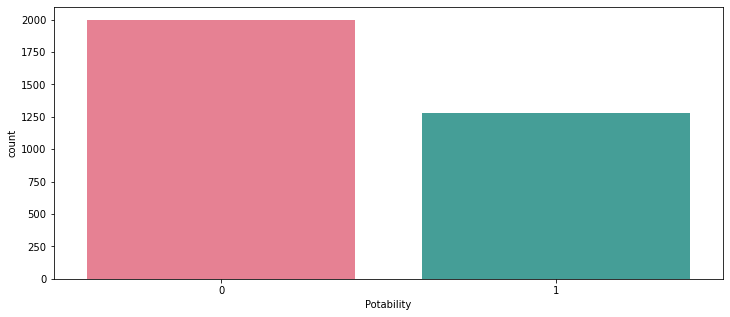

In [8]:
plt.figure(figsize=(12, 5))
sns.countplot(x="Potability", data=water_df, palette='husl')

<AxesSubplot:>

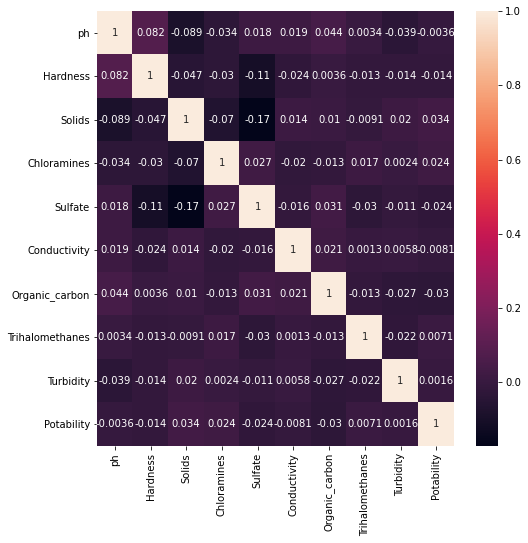

In [9]:
plt.figure(figsize=(8, 8))
matrix = water_df.corr()
sns.heatmap(water_df.corr(), annot=True)

### ML Model

In [10]:
!pip install pycaret==2.3

/lib/python3.8/site-packages (from pycaret==2.3) (0.7.0)


In [1]:
from pycaret.classification import *

In [2]:
water_df = pd.read_csv('Water Quality_Data/water_potability.csv')
# water_df.dropna(inplace=True)

In [3]:
s = setup(data=water_df, target ='Potability',log_experiment=True,experiment_name='Water_QV1',normalize=True,remove_outliers=True)

,Description,Value
0,session_id,4729
1,Target,Potability
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(3276, 10)"
5,Missing Values,True
6,Numeric Features,9
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [4]:
best = compare_models(fold=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.6809,0.6847,0.3464,0.6701,0.4560,0.2608,0.2900,0.0060
catboost,CatBoost Classifier,0.6726,0.6819,0.3429,0.6416,0.4468,0.2436,0.2678,1.3480
et,Extra Trees Classifier,0.6690,0.6794,0.2929,0.6595,0.4053,0.2207,0.2557,0.0680
rf,Random Forest Classifier,0.6607,0.6621,0.3119,0.6222,0.4143,0.2111,0.2367,0.1040
lightgbm,Light Gradient Boosting Machine,0.6483,0.6546,0.3905,0.5627,0.4605,0.2126,0.2204,0.0860
gbc,Gradient Boosting Classifier,0.6414,0.6143,0.2417,0.5912,0.3421,0.1507,0.1804,0.0960
xgboost,Extreme Gradient Boosting,0.6414,0.6397,0.4131,0.5463,0.4701,0.2072,0.2119,26.2880
nb,Naive Bayes,0.6231,0.5953,0.2000,0.5365,0.2903,0.1005,0.1244,0.1520
knn,K Neighbors Classifier,0.6212,0.6035,0.3571,0.5131,0.4210,0.1528,0.1584,0.2140
lr,Logistic Regression,0.6152,0.5148,0.0024,0.4000,0.0047,0.0029,0.0242,0.2260


In [5]:
qda = create_model('qda', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6812,0.7136,0.3750,0.6495,0.4755,0.2694,0.2904
1,0.6353,0.6308,0.3036,0.5484,0.3908,0.1602,0.1745
2,0.6720,0.6521,0.3214,0.6506,0.4303,0.2354,0.2643
3,0.7103,0.7172,0.3869,0.7386,0.5078,0.3299,0.3645
4,0.7057,0.7098,0.3452,0.7632,0.4754,0.3092,0.3562
Mean,0.6809,0.6847,0.3464,0.6701,0.4560,0.2608,0.2900
SD,0.0270,0.0360,0.0314,0.0761,0.0409,0.0599,0.0692


In [7]:
tuned_qda = tune_model(qda,fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6789,0.7100,0.3155,0.6795,0.4309,0.2469,0.2821
1,0.6468,0.6268,0.2798,0.5875,0.3790,0.1736,0.1969
2,0.6720,0.6511,0.2857,0.6761,0.4017,0.2240,0.2635
3,0.6920,0.7138,0.3214,0.7297,0.4463,0.2751,0.3194
4,0.7080,0.7062,0.3214,0.8060,0.4596,0.3070,0.3679
Mean,0.6795,0.6816,0.3048,0.6957,0.4235,0.2453,0.2860
SD,0.0205,0.0357,0.0182,0.0717,0.0294,0.0454,0.0571


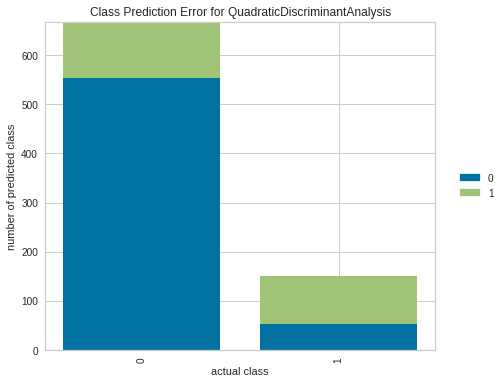

In [8]:
plot_model(tuned_qda,plot='error')

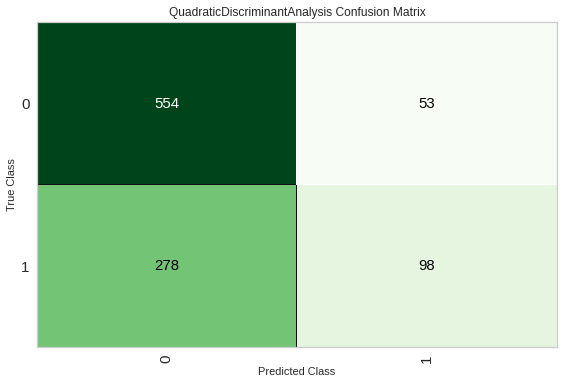

In [9]:
plot_model(tuned_qda,plot='confusion_matrix')